# Lecture 11: Sorting with Lambda and Plotting

In today's lecture we will learn how we can sort data in other ways than the default sorting behaviour given by Python, using anonymous **lambda** functions.  We will use this sorting functionality to plot some data using Python's `matplotlib` module.   

**Acknowlegement.** This notebook has been adapted from the Wellesley CS111 Spring 2019 course materials (http://cs111.wellesley.edu/spring19).

<a id="sec1"></a>

## Review: Sorted function 

The built-in function `sorted` always returns a new list:

In [1]:
numbers = [35, -2, 17, -9, 0, 12, 19] 
sorted(numbers)

[-9, -2, 0, 12, 17, 19, 35]

Make sure that `numbers` hasn't changed:

In [2]:
numbers

[35, -2, 17, -9, 0, 12, 19]

By default the list is sorted in the **ascending** order, but we can easily reverse the order:

In [3]:
sorted(numbers, reverse=True)

[35, 19, 17, 12, 0, -2, -9]

**Sorting other sequences**  Strings and tuples can also be sorted in the same way. The result is **always** going to be a new list.

In [4]:
phrase = 'Red Code 1'
sorted(phrase) # sorted based on ascii ordering

[' ', ' ', '1', 'C', 'R', 'd', 'd', 'e', 'e', 'o']

Just as in the case of the list `numbers` in the above example, the string value of `phrase` hasn't changed:

In [5]:
phrase

'Red Code 1'

This is to be expected, because strings are **immutable**.

In [6]:
digits = (9, 7, 5, 3, 1) # this is a tuple 

In [7]:
sorted(digits)

[1, 3, 5, 7, 9]

Notice that the result of the sorting is a list, not a tuple.

In [ ]:
digits

The original tuple value hasn't changed.

## Sorting a list of sequences

We can sort list of sequences such as list of strings, list of tuples, and list of lists.  
Sorting the list of tuples and the list of lists is going to be similar. The same principles will apply.

#### Sorting a list of strings

In [8]:
# a long string that we will split into a list of words
phrase = "99 red balloons *floating* in the Summer sky" 
words = phrase.split()
words

['99', 'red', 'balloons', '*floating*', 'in', 'the', 'Summer', 'sky']

In [9]:
sorted(words)

['*floating*', '99', 'Summer', 'balloons', 'in', 'red', 'sky', 'the']

In [10]:
listOfLists = [[3, 1], [3, 10], [15, 2]]
sorted(listOfLists)

[[3, 1], [3, 10], [15, 2]]

#### Sorting a list of tuples

Tuples are compared element by element, starting with the one at index 0. This is known as **lexicographic order**, which is a generalization of dictionary order on strings in which each tuple element generalizes a character in a string. 

In [11]:
triples = [(8, 'a', '$'), (7, 'c', '@'),
           (7, 'b', '+'), (8, 'a', '!')] 

sorted(triples)

[(7, 'b', '+'), (7, 'c', '@'), (8, 'a', '!'), (8, 'a', '$')]

**Question.** What happens in the case of ties for the first elements of tuples?  
Notice that Python keeps comparing elements of the tuples until we find two that are not the same.

In [12]:
ord('!') < ord('$')

True

**Question.** How do we sort a tuple based on the second item rather than first?

#### `sorted()` on dictionaries and a list of dictionaries

What does the sorted function do when we use it of a dictionary or a list of dictionaries?   Recall that a dictionary inherently is an unordered collection.

In [13]:
daysOfMonth = {'Jan': 31, 'Feb': 28, 'Mar': 31, 'Apr': 30,
               'May': 31, 'Jun': 30, 'Jul': 31, 'Aug': 31,
               'Sep': 30, 'Oct': 31, 'Nov': 30, 'Dec': 31} 

In [14]:
sorted(daysOfMonth) 

['Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

**Question.** How do we sort a dictionary by its values rather than keys?

**Sorting a list of dictionaries.** Suppose we wanted to sort the following list of fruit dictionaries by their weight parameter.  Python does not know how to sort dictionaries by default as they have no pre-defined order.

In [15]:
fruitDictsList = [{'name': 'apple', 'weight': 20}, 
                  {'name': 'orange', 'weight': 5}, 
                  {'name': 'kiwi', 'weight': 15.7}]
sorted(listOfDicts)  
# by default Python does not know how to compare two dicts

NameError: name 'listOfDicts' is not defined

**Question.** How do we sort a list of dictionary by some parameter, such as their weights in the above example?

## Implementing Different Sorting Behavior

Now we will look at the general question of how do we sort in a way that is different from Python's default behaviour (sorting lexicographically)?

In [16]:
missionTuples = [('Apollo 11', 8), ('Mercury-Redstone 3', 1),
            ('Apollo 13', 5), ('Gemini 3', 1), ('Little Joe 6', 1)]

In [17]:
missionLists = [['Apollo 11', 8], ['Mercury-Redstone 3', 1],
            ['Apollo 13', 5], ['Gemini 3', 1], ['Little Joe 6', 1]]

In [18]:
sorted(missionTuples) # by default sorts by item 1: missionName

[('Apollo 11', 8),
 ('Apollo 13', 5),
 ('Gemini 3', 1),
 ('Little Joe 6', 1),
 ('Mercury-Redstone 3', 1)]

**Our Problem:** How to sort the missions not by name (default), but by days?

### Sorting with the `key` parameter

The function `sorted` allows us to perform sorting by using the `key` parameter, which specifies a function that for each element determines how it should be compared to other elements. 

In [19]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [20]:
def days(missions):
    """Takes a sequence and returns the item at index 1"""
    return missions[1]

In [21]:
sorted(missionTuples, key=days) # sort by num of days 

[('Mercury-Redstone 3', 1),
 ('Gemini 3', 1),
 ('Little Joe 6', 1),
 ('Apollo 13', 5),
 ('Apollo 11', 8)]

In [22]:
sorted(missionLists, key=days, reverse=True) # works the same for lists 

[['Apollo 11', 8],
 ['Apollo 13', 5],
 ['Mercury-Redstone 3', 1],
 ['Gemini 3', 1],
 ['Little Joe 6', 1]]

**Exercise** Write a function `lenName` that when used as `key` will allow us to sort by the length of mission names.

In [24]:
# define function that returns length of mission names
def lenName(mission):
    """Takes a sequence and returns the length of item at index 0"""
    return len(mission[0])

In [25]:
# use the function as key for sorting
sorted(missionTuples, key=lenName)

[('Gemini 3', 1),
 ('Apollo 11', 8),
 ('Apollo 13', 5),
 ('Little Joe 6', 1),
 ('Mercury-Redstone 3', 1)]

### More complex sorting

Things get more complicated in situations where elements in a list to be sorted have the same key, and we want to sort by a second key. For example consider the following mission tuples.  The first three when sorted by days have a tie (each go on for 1 day).  

In [26]:
sorted(missionTuples, key=days) # sorts by days

[('Mercury-Redstone 3', 1),
 ('Gemini 3', 1),
 ('Little Joe 6', 1),
 ('Apollo 13', 5),
 ('Apollo 11', 8)]

**Question.** The resulting tuples are indeed sorted by days, but how to explain the order for items with the same days? 

Python's sorting functions/methods are **stable**, which means that items that are equal according to the sorting key have the same relative order as in the original list.

How can we sort missions with the same number of days, alphabetically by the mission name?  

In [27]:
def programName(mission):
    """Takes a sequence and returns the item at index 0"""
    return mission[0]

In [28]:
# A key function that returns a tuple to specify 
# lexicographic ordering by the elements of that tuple. 
def daysProgram(missions):
    return (days(missions), programName(missions))

In [29]:
# write the sorted expression to sort first by days 
# and then alphabetically by name
sorted(missionTuples, key=daysProgram)


[('Gemini 3', 1),
 ('Little Joe 6', 1),
 ('Mercury-Redstone 3', 1),
 ('Apollo 13', 5),
 ('Apollo 11', 8)]

## `lambda` Notation for Anonymous Functions

Thus far we have always used `def` to create functions that have names. 

But Python has a `lambda` notation for **anonymous functions** that need not be named: 

`lambda` _parameterName_ `:` _expressionForReturnedValue_

Below is how we can use `lambda` to replace the function `days`:

In [30]:
sorted(missionTuples, key=lambda missions: missions[1])

[('Mercury-Redstone 3', 1),
 ('Gemini 3', 1),
 ('Little Joe 6', 1),
 ('Apollo 13', 5),
 ('Apollo 11', 8)]

`lambda` notation is very convenient specifying a function exactly where we need it (like in the `key` parameter of `sorted`) rather than having to define a named function elsewhere via `def` and then use the name. 

### Some properties of `lambda`

The function created by `lambda` can be invoked directly on an argument:

In [31]:
(lambda x: x*x)(4)

16

Although functions created by `lambda` are initially anonymous, they **can** be named by variables:

In [32]:
sq = lambda x: x*x
sq(4)

16

###  Sorting with `lambda`  

`lambda` functions are particularly handy to express a `key` function in sorting. 

Predict the element ordering in the result of the following sorting examples, then verify.

In [33]:
sorted(missionLists, key=lambda missions: len(missions[0]))

[['Gemini 3', 1],
 ['Apollo 11', 8],
 ['Apollo 13', 5],
 ['Little Joe 6', 1],
 ['Mercury-Redstone 3', 1]]

**Exercise.** Write an expression to sort with lambda notation `misstionTuples` in ascending order first by number of days and then by length of the program name.

In [36]:
sorted(missionLists, key=lambda missions: (missions[1], len(missions[0])))

[['Gemini 3', 1],
 ['Little Joe 6', 1],
 ['Mercury-Redstone 3', 1],
 ['Apollo 13', 5],
 ['Apollo 11', 8]]

#### Leftovers:  Sorted with Key on Dictionaries

**Questions.** 
* How do we sort a dictionary by its values rather than keys?
* How do we sort a list of dictionaries by some parameter, such as the value of the `weight` key in the `fruitDictsList` example?

In [37]:
daysOfMonth = {'Jan': 31, 'Feb': 28, 'Mar': 31, 'Apr': 30,
               'May': 31, 'Jun': 30, 'Jul': 31, 'Aug': 31,
               'Sep': 30, 'Oct': 31, 'Nov': 30, 'Dec': 31} 

In [38]:
sorted(daysOfMonth)

['Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

**Function to access keys** To use the key parameter of sorted we need a way a function which when given a dictionary, accesses its key if it exists, and returns the corresponding value.

In [39]:
sorted(daysOfMonth, key=daysOfMonth.get) # replace ? here

['Feb',
 'Apr',
 'Jun',
 'Sep',
 'Nov',
 'Jan',
 'Mar',
 'May',
 'Jul',
 'Aug',
 'Oct',
 'Dec']

**Sorting a list of dictionaries.** Recall the the following lists of dictionaries `fruitDictsList` where we want to sort them by their weights.

In [41]:
fruitDicts = [{'name': 'apple', 'weight': 20}, 
                  {'name': 'orange', 'weight': 15}, 
                  {'name': 'kiwi', 'weight': 15}]
# by default Python does not know how to compare two dicts

**Using Sorting with Lambda.**  We can sort the above list of dictionaries based on the weight values of each key using lambda sorting.  What should we write to accomplish that?

In [42]:
# write the expression 
sorted(fruitDicts, key=lambda fDict: fDict['weight'])


[{'name': 'orange', 'weight': 15},
 {'name': 'kiwi', 'weight': 15},
 {'name': 'apple', 'weight': 20}]

**Sorting by some function of name.**  What if we wanted to sort the dictionaries first by weight and then alphabetically by fruit name if therea are ties?

In [ ]:
# write expression here

## Lecture Part 2: Plotting with Matplotlib 

Now, we will see how we can use the `matplotlib` library to visualize data through plots.

In [44]:
%matplotlib inline   
# previous line causes the plots to show inside the notebook, 
# as opposed to in a separate window
import matplotlib.pyplot as plt 
# as plt means we can now call the functions in the module with plt
# rather than having to type matplotlib.pyplot each time

#the next line to fix resolution for lecture
plt.rcParams['figure.dpi']= 100

### The `plot` function
We'll start simple by plotting a simple line, and continue from there.

To plot a line, if we provide two values, we can draw a line between them. Notice that if only provide Y coordinates, matplotlib assigns X coordinates as indices (0, 1, 2, etc.)

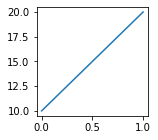

In [45]:
plt.figure(figsize=(2,2))
plt.plot([10, 20]) # plot y coordinates 10 and 20
plt.show()

Notice that the two points being plotted are (0, 10) and (1, 20).
### Providing points by x,y values
We provide two separate lists, one with all x coordinate, and one with all y coordinates.

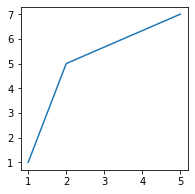

In [46]:
plt.figure(figsize=(3, 3))
plt.plot([1, 2, 5], [1, 5, 7])
plt.show()

<a id = "sec2"></a>

### Decorating the plot
We can add more elements to the plot, such as tick values that we want, labels for the axes, title of the plot, etc.

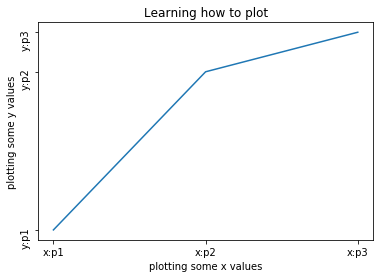

In [47]:
plt.figure()
plt.plot([0, 5, 10], [4, 12, 14])
plt.xticks([0, 5, 10], # points where to show the tick
           ['x:p1', 'x:p2', 'x:p3']) # values to show for ticks
plt.yticks([4, 12, 14], 
           ['y:p1', 'y:p2', 'y:p3'],
           rotation=90) # rotate the tick labels, because are shown horizontally
plt.xlabel("plotting some x values")
plt.ylabel("plotting some y values")
plt.title("Learning how to plot")
plt.show()

## Recall:  `frequencies` with `get`

Recall we wrote the following `frequencies` function that takes in a list words and returns a dictionary where each key is a word in the list and its value is the number of times that word appears in the list.

In [48]:
# we wrote this together in last lecture
def frequencies(wordList):
    """Given a list of words, returns a dictionary of word frequencies"""
    freqDict = {}
    for word in wordList:
        freqDict[word] = freqDict.get(word, 0) + 1
    return freqDict

In [49]:
# you wrote this in lab 3
def fileToList(filename):
    wordList = []
    for line in open(filename):
        wordList.extend(line.strip().split())
    return wordList

In [50]:
bookWords = fileToList('prideandprejudice.txt')

In [51]:
# test our function on pride and prejudice
pridePrejDict = frequencies(bookWords)
len(pridePrejDict)

6372

**Question.** How do we sort the dictionary of words based on the frequency of the words (*highest to lowest*)?

In [55]:
sortedWordList = sorted(pridePrejDict, key=pridePrejDict.get, reverse=True) # replace ? with expression 

In [56]:
sortedWordList[1:10] # lot of common words!

['to', 'of', 'and', 'her', 'i', 'a', 'in', 'was', 'she']

**Removing boring stopwords.** Such words are common when processing text files, they are called "stop words" which you remove when analyzing the words.  This `stopwords.txt` is a collection of such words downloaded from https://gist.github.com/larsyencken/1440509.

In [59]:
stopWords = fileToList('stopwords.txt')

**List Comprehension to Filter.** We want to filter out all words in list `stopWords` from the list `sortedWordList` and return the result as a new list.  How can we accomplish this using a list comprehension?

In [61]:
topWords = [word for word in sortedWordList if word not in stopWords] # write list comprehension

In [62]:
len(topWords)

6016

In [63]:
topTenWords = topWords [0:10]  # top ten words
topTenWords

['elizabeth',
 'darcy',
 'bennet',
 'miss',
 'jane',
 'bingley',
 'soon',
 'time',
 'little',
 'own']

## Word Frequence as a Bar Plot

Lets plot the frequency of the top ten words in Pride and Prejudice as a bar plot using `matplotlib`.

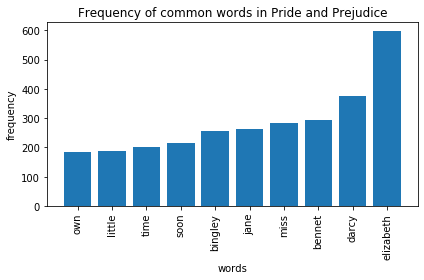

In [64]:
labels = topTenWords[::-1] # using words as labels
# reverse order to plot least freq to most
positions = list(range(len(labels)))
# for each word in topSortedWords[0:10]
# lets get their frequencies from the dictionary
values = [pridePrejDict[word] for word in labels]

# Create a new figure:
plt.figure()
# Create a bar chart
plt.bar(positions, values)

# Set x tick labels from names
# rotate by 90 so labels are vertical and do not overlap
plt.xticks(positions, labels, rotation=90) 
# Set title and label axes
plt.title("Frequency of common words in Pride and Prejudice")
plt.xlabel("words")
plt.ylabel("frequency")
# Use a 'tight' layout to avoid cutting off rotated xticks
plt.tight_layout()
# Show our chart:
#plt.show()
plt.savefig('wordFreqPlot.pdf') 